# Najboljša piva na strani Ratebeer

V projektni nalogi sem zajela podatke s prvih 100 strani na seznamu največkrat ocenjenih piv na spletni strani [Ratebeer](https://www.ratebeer.com/beer-ratings/).

## Zajeti podatki:
- ime piva
- spletni naslov
- ocena (od 0 do 5)
- pivovarna
- mesto
- država
- stil
- alkohol (v procentih)
- kozarec

V nadaljevanju bom obravnavala odvisnost kakovosti piva od države in stila, povprečno vsebnost akohola za državo, število pivovarn po državi, povprečna vsebnost alkohola glede na kozarec, itd.

In [4]:
import pandas as pd
%matplotlib inline

In [7]:
imena = pd.read_csv('imena.csv')
pivo = pd.read_csv('pivo.csv')
kozarci = pd.read_csv('kozarci.csv')

pd.options.display.max_rows = 14
pd.set_option('display.mpl_style', 'default')

c:\users\anja\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


Oglejmo si tabele:

In [9]:
imena.head(10)

,ime,naslov
0,Buxton Extra Porter,/buxton-extra-porter/409056/
1,Prairie Coffee Okie,/prairie-coffee-okie/382217/
2,Oskar Blues Hotbox Coffee Porter,/oskar-blues-hotbox-coffee-porter/132098/
3,Three Floyds Wigsplitter,/three-floyds-wigsplitter/342218/
4,Stillwater Gose Gone Wild,/stillwater-gose-gone-wild/266266/
5,Founders KBS &#40;Kentucky Breakfast Stout&#41;,/founders-kbs-kentucky-breakfast-stout/40544/
6,Cigar City White Oak Jai Alai India Pale Ale,/cigar-city-white-oak-jai-alai-india-pale-ale/...
7,Hoppin\xc2\x92 Frog Rum Barrel Aged Silk Porter,/hoppin-frog-rum-barrel-aged-silk-porter/323062/
8,Superstition Aphrodisia Pyment - Cabernet/Pino...,/superstition-aphrodisia-pyment--cabernet-pino...
9,Dogfish Head 60 Minute IPA,/dogfish-head-60-minute-ipa/7431/


In [10]:
pivo.head(10)

,naslov,ocena,pivovarna,mesto,drzava,stil,alkohol
0,/arrogant-bastard-ale/1315/,3.89,Stone Brewing,Escondido,USA,American Strong Ale,7.2
1,/pipeworks-lil-citra/392754/,3.65,Pipeworks Brewing Company,Chicago,USA,Session IPA,4.9
2,/buxton--omnipollo-lemon-meringue-ice-cream-pi...,3.68,Buxton,NaN,England,Fruit Beer,6.0
3,/founders-breakfast-stout/14956/,4.15,Founders Brewing Company,Grand Rapids,USA,Imperial Stout,8.3
4,/trillium--amager-sigtebrod/454740/,3.85,Trillium Brewing Company,Boston,USA,India Pale Ale &#40;IPA&#41;,6.8
5,/crouch-vale-amarillo/24922/,3.60,Crouch Vale,NaN,England,Golden Ale/Blond Ale,5.0
6,/victory-cage-radler/351429/,2.97,Victory Brewing Company &#40;ABV&#41;,Downingtown,USA,Radler/Shandy,3.0
7,/rodenbach-alexander/1195/,4.15,Brouwerij Rodenbach (Palm),NaN,Belgium,Sour Red/Brown,6.0
8,/oskar-blues-hotbox-coffee-porter/132098/,3.68,Oskar Blues Brewery,Longmont,USA,Porter,6.5
9,/schneider-weisse-tap-x-mathilda-soleil/319360/,3.72,Schneider Weisse G. Schneider & Sohn GmbH,NaN,Germany,Weizen Bock,7.0


In [11]:
kozarci.head(10)

,naslov,kozarec
0,/arrogant-bastard-ale/1315/,Snifter
1,/arrogant-bastard-ale/1315/,Tulip
2,/pipeworks-lil-citra/392754/,English pint
3,/pipeworks-lil-citra/392754/,Shaker
4,/pipeworks-lil-citra/392754/,Stem glass
5,/pipeworks-lil-citra/392754/,Tumbler
6,/buxton--omnipollo-lemon-meringue-ice-cream-pi...,Flute
7,/buxton--omnipollo-lemon-meringue-ice-cream-pi...,Shaker
8,/founders-breakfast-stout/14956/,Snifter
9,/trillium--amager-sigtebrod/454740/,Shaker


Tabeli _pivo_ bom dodala **imena** in razvrstila piva po ocenah.

In [12]:
tabela = pd.merge(imena, pivo)[['ime', 'ocena', 'pivovarna', 'mesto', 'drzava', 'stil', 'alkohol']]
tabela

,ime,ocena,pivovarna,mesto,drzava,stil,alkohol
0,Buxton Extra Porter,3.89,Buxton,NaN,England,Porter,7.40
1,Prairie Coffee Okie,3.91,Krebs Brewing Company / Pete\xc2\x92s Place / ...,Tulsa,USA,American Strong Ale,13.00
2,Oskar Blues Hotbox Coffee Porter,3.68,Oskar Blues Brewery,Longmont,USA,Porter,6.50
3,Three Floyds Wigsplitter,3.87,Three Floyds Brewing Company,Munster,USA,Sweet Stout,7.70
4,Stillwater Gose Gone Wild,3.96,Crazy Mountain Brewing Company,Baltimore,USA,Grodziskie/Gose/Lichtenhainer,4.30
5,Founders KBS &#40;Kentucky Breakfast Stout&#41;,4.28,Founders Brewing Company,Grand Rapids,USA,Imperial Stout,11.20
6,Cigar City White Oak Jai Alai India Pale Ale,3.86,Cigar City Brewing,Tampa,USA,India Pale Ale &#40;IPA&#41;,7.50
...,...,...,...,...,...,...,...
655,Crooked Stave Nightmare on Brett &#40;Raspberr...,4.04,Crooked Stave,Denver,USA,Sour/Wild Ale,9.67
656,Epic Utah Sage Saison,3.60,Epic Brewing Company &#40;UT/CO&#41;,Salt Lake City,USA,Spice/Herb/Vegetable,7.50


In [41]:
tabela[['ime', 'ocena']].sort_values('ocena')

,ime,ocena
438,Heineken H41,2.92
565,Roslyn Brookside Pale Lager,2.92
605,Narragansett Del\xc2\x92s Shandy,2.98
385,Stiegl Radler Grapefruit,3.05
403,Parallel 49 Tricycle Radler - Grapefruit,3.06
183,Flying Dog Heat Series: Ancho Lime Paradise Lager,3.16
175,Anchor California Lager,3.20
563,Payette North Fork Lager,3.22
529,Squatters Live & Let Live Kristallweizen,3.26
242,Wasatch Snap Down India Pale Lager,3.27


In [67]:
tabela.groupby('drzava').size()

drzava
Austria          1
Belgium         23
Canada          41
England         69
France           1
Germany         40
Italy            3
Netherlands      2
Republic         1
USA            481
dtype: int64

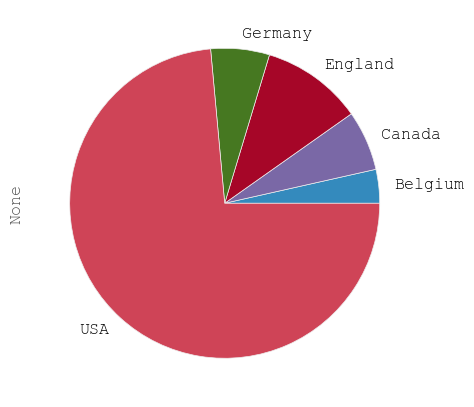

In [74]:
tabela.groupby('drzava').size()[tabela.groupby('drzava').size()>3].plot(kind='pie', figsize=(5, 5), fontsize=12)

In [53]:
tabela.groupby('drzava')[['alkohol']].mean().sort_values('alkohol')

,alkohol
drzava,
Austria,2.000000
Republic,4.500000
Netherlands,5.650000
England,5.897101
Germany,6.457500
Canada,6.924390
France,7.000000
USA,7.857300
Belgium,9.026087


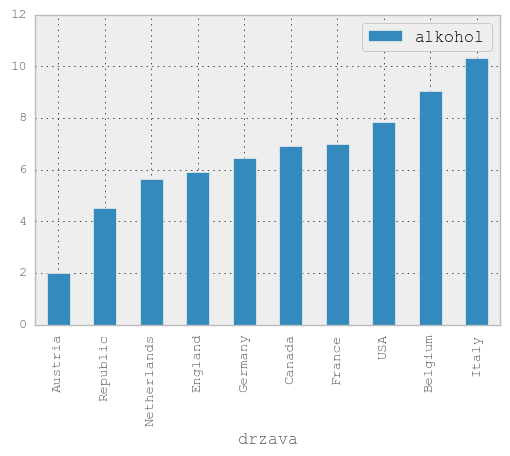

In [52]:
tabela.groupby('drzava')[['alkohol']].mean().sort_values('alkohol').plot(kind='bar')

In [88]:
tabela.groupby('stil').mean().sort_values('alkohol')[['alkohol']]

,alkohol
stil,
Low Alcohol,2.633333
Radler/Shandy,3.560000
Golden Ale/Blond Ale,4.207143
Bitter,4.240000
Dry Stout,4.650000
German Kristallweizen,4.700000
Session IPA,4.781250
K\xc3\xb6lsch,4.800000
Dortmunder/Helles,4.950000


In [107]:
tabela[tabela['stil'] == 'Imperial IPA'].sort_values('ocena')[['ime', 'ocena', 'drzava', 'alkohol']]

,ime,ocena,drzava,alkohol
180,Pipeworks Emerald Grouper,3.91,USA,9.50
433,Hill Farmstead Society & Solitude #8,3.91,USA,8.00
468,Stone 20th Anniversary Encore Series: 10th Ann...,3.91,USA,10.00
344,Bear Republic Hop Rod Rye Ale,3.91,USA,8.00
439,Beavertown Skull King,3.92,England,8.70
319,Knee Deep Simtra Triple IPA,3.92,USA,11.25
92,Bell\xc2\x92s The Oracle DIPA Ale,3.92,USA,10.40
614,Grimm Lambo Door,3.92,USA,8.00
371,Tree House Bright,3.93,USA,7.80
501,Columbus Bodhi,3.93,USA,8.50


In [134]:
#mesta = tabela.groupby('mesto')['pivovarna']
#mesta.groupby('pivovarna').size().count()

AttributeError: Cannot access callable attribute 'groupby' of 'SeriesGroupBy' objects, try using the 'apply' method

In [131]:
tabela[tabela['mesto'] == 'San Diego'].groupby('pivovarna').size().count()
# st. pivovaren v San Diegu

5